In [1]:
# ============================
# 1. Stroke Prediction
# ============================

# Import required libraries for data manipulation and visualization

import pandas as pd  # For handling data in tabular format (DataFrames)
import numpy as np  # For numerical operations and array handling

import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns  # For enhanced statistical data visualization

# Import scikit-learn modules for model building and evaluation

from sklearn.model_selection import train_test_split, cross_val_score  # For splitting data and cross-validation

from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.tree import DecisionTreeClassifier  # Decision Tree model
from sklearn.ensemble import RandomForestClassifier  # Random Forest model

from sklearn.metrics import classification_report, confusion_matrix  # For evaluating model performance

# Import SMOTE from imbalanced-learn to handle class imbalance
from imblearn.over_sampling import SMOTE  # Synthetic Minority Over-sampling Technique to balance minority class

In [2]:
# ============================================
# 2. Load and Inspect Dataset
# ============================================

# Define the URL of the raw CSV file hosted on GitHub
url = 'https://raw.githubusercontent.com/monirulislammd/CIND820-Big-Data-Analytics-Project/main/healthcare-dataset-stroke-data.csv'

# Read the CSV file directly from the GitHub URL into a pandas DataFrame
df = pd.read_csv(url)

# Display dataset shape and data types
print("\nDataset Shape:", df.shape, "\n")  # Print number of rows and columns
print(df.info())  # Show column names, non-null counts, and data types

# Display first few rows of the dataset
print("\n Example Dataset:")
df.head()  # Preview the top 5 rows to understand structure and sample values


Dataset Shape: (5110, 12) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None

 Example Dataset:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# ============================================
# 3. Data Cleaning and Preprocessing
# ============================================

# Check for missing values in each column
print("Missing values per column:\n", df.isnull().sum())  # Identify columns with missing data

# Impute missing BMI values using the median (robust to outliers)
df['bmi'].fillna(df['bmi'].median(), inplace=True)  # Replace NaNs in 'bmi' with median value

# Drop 'id' column (not useful for prediction)
df.drop(columns=['id'], inplace=True, errors='ignore')  # Remove identifier column if present

# Remove rows where gender is 'Other' to avoid one-hot encoding mismatch
df.drop(df[df['gender'] == 'Other'].index, inplace=True)  # Drop rows with ambiguous gender category

# Replace 'Unknown' in smoking_status with 'never smoked' for consistency
df['smoking_status'] = df['smoking_status'].replace('Unknown', 'never smoked')  # Simplify category

# Final check for missing values after cleaning
print("\nMissing values after imputation:\n", df.isnull().sum())  # Confirm all missing values handled

# Display summary statistics of cleaned dataset
print("\n\nSummary Statistics:\n")
df.describe() # Show count, mean, std, min, max, and quartiles for numeric columns

Missing values per column:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Missing values after imputation:
 gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


Summary Statistics:



/tmp/ipython-input-1497708546.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)  # Replace NaNs in 'bmi' with median value


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.863300,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.699785,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


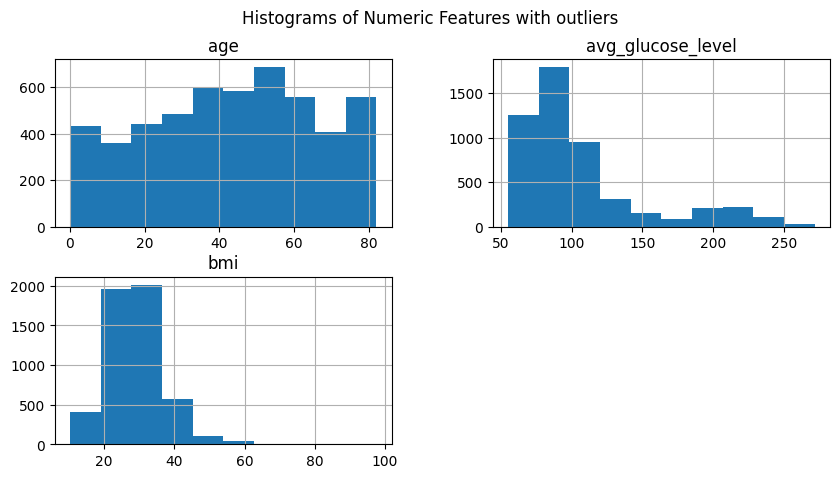

In [4]:
# =========================================
# 4. Handle Outliers (IQR Clipping)
# =========================================

# Plot histograms for key numeric features to understand their distributions
df[['age', 'avg_glucose_level', 'bmi']].hist(figsize=(10,5))  # Create histograms for selected numeric columns
plt.suptitle("Histograms of Numeric Features with outliers\n")  # Add a super title for the figure
plt.show()  # Display the plot

# Loop through selected numerical columns to cap outliers
for col in ['age', 'avg_glucose_level', 'bmi']:
    Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range (spread of middle 50%)

    # Define lower and upper bounds for acceptable values
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    # Cap values outside the bounds using np.clip
    df[col] = np.clip(df[col], lower, upper)  # Values below 'lower' set to 'lower', above 'upper' set to 'upper'

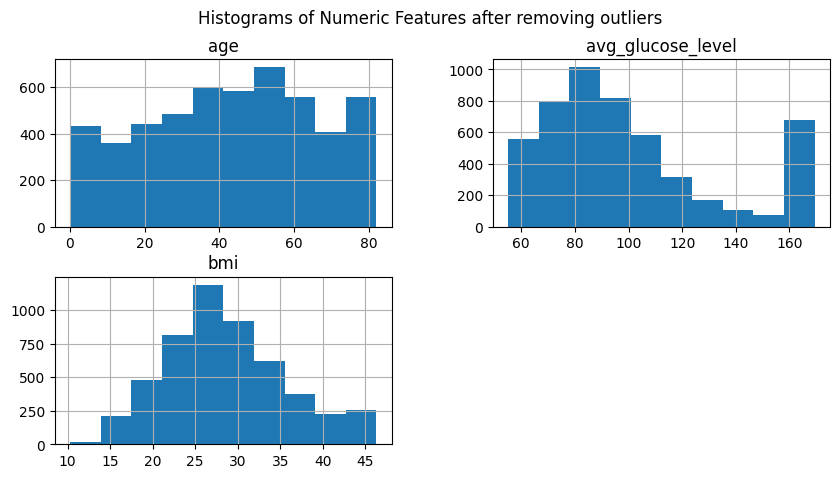



Frequency Distribution of categorial features:


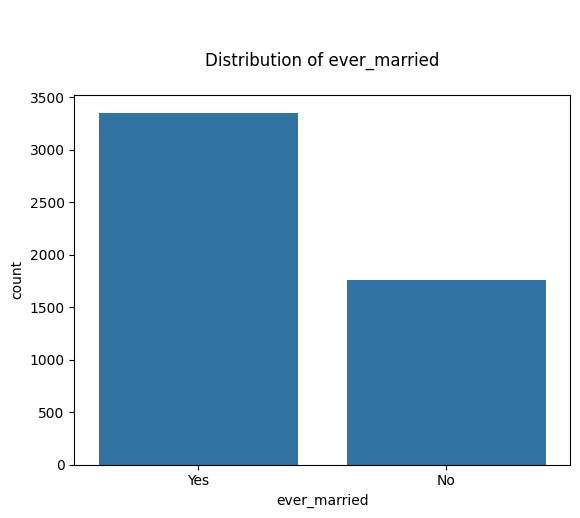

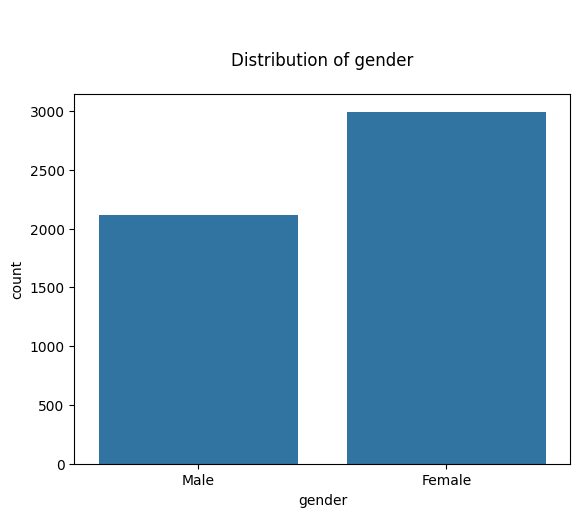

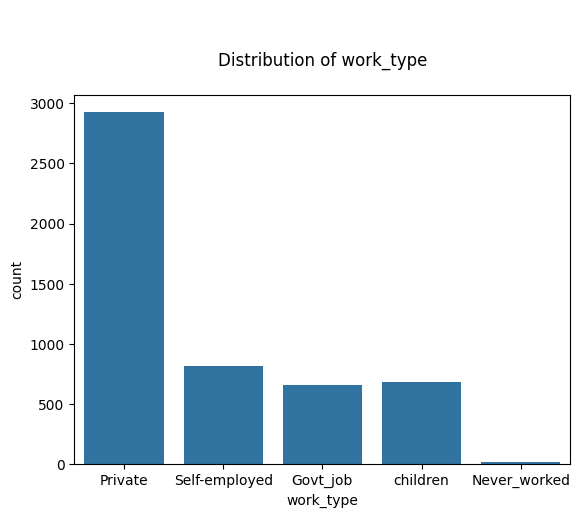

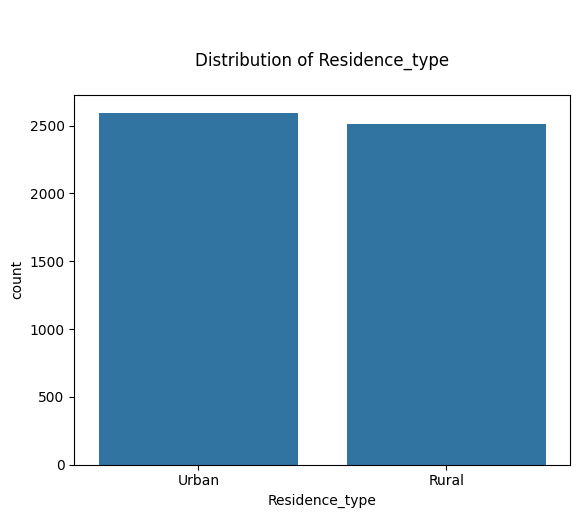

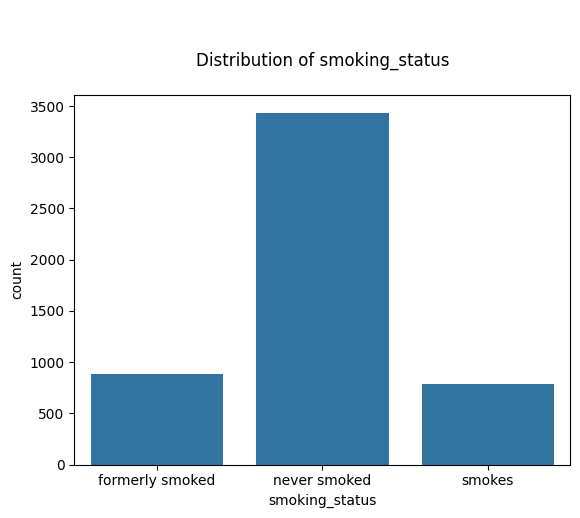

In [5]:
# =========================================
# 5. Exploratory Data Analysis (EDA)
# =========================================

# Plot histograms for key numeric features to understand their distributions
df[['age', 'avg_glucose_level', 'bmi']].hist(figsize=(10,5))  # Create histograms for selected numeric columns
plt.suptitle("Histograms of Numeric Features after removing outliers\n")  # Add a super title for the figure
plt.show()  # Display the plot

# Define categorical columns to visualize their frequency distributions
cat_cols = ['ever_married', 'gender', 'work_type', 'Residence_type', 'smoking_status']

# Loop through each categorical column and plot a countplot

print("\n\nFrequency Distribution of categorial features:")
for c in cat_cols:
    sns.countplot(x=c, data=df)  # Bar chart showing frequency of each category
    plt.title(f"\n\nDistribution of {c}\n")  # Title for each plot
    plt.show()  # Display the plot

In [6]:
# ==========================
# 6. Feature Encoding
# ==========================

# Encode binary categorical features to numeric format (0/1)
df['ever_married'] = df['ever_married'].map({'No': 0, 'Yes': 1})  # Convert 'ever_married' to binary
df['hypertension'] = df['hypertension'].map({0: 0, 1: 1})  # Already numeric, but ensures consistency
df['heart_disease'] = df['heart_disease'].map({0: 0, 1: 1})  # Already numeric, but explicitly mapped

# Apply one-hot encoding to multi-category features
# drop_first=True avoids dummy variable trap (perfect multicollinearity)
df = pd.get_dummies(
    df,
    columns=['gender', 'work_type', 'Residence_type', 'smoking_status'],
    drop_first=True  # Drops first category to keep k-1 encoded columns
)

# Display first few rows of the encoded dataset
print("Encoded Dataset:\n")
df.head()  # Preview transformed dataset with encoded features

Encoded Dataset:



,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Male,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,169.365,36.6,1,True,False,True,False,False,True,False,False
1,61.0,0,0,1,169.365,28.1,1,False,False,False,True,False,False,True,False
2,80.0,0,1,1,105.920,32.5,1,True,False,True,False,False,False,True,False
3,49.0,0,0,1,169.365,34.4,1,False,False,True,False,False,True,False,True
4,79.0,1,0,1,169.365,24.0,1,False,False,False,True,False,False,True,False


In [7]:
# ============================================
# 7. Handle Class Imbalance (SMOTE)
# ============================================

# Separate features (X) and target (y)
X = df.drop('stroke', axis=1)  # Drop the target column to get feature matrix
y = df['stroke']  # Target variable indicating stroke occurrence (0 = No, 1 = Yes)

# Check class distribution before applying SMOTE
print("Before balancing:\n\n", y.value_counts(normalize=True))  # Show class proportions (e.g., 95% no stroke, 5% stroke)

# Apply SMOTE to balance the dataset by oversampling the minority class
sm = SMOTE(random_state=42)  # Initialize SMOTE with a fixed random seed for reproducibility
X_res, y_res = sm.fit_resample(X, y)  # Generate synthetic samples for minority class

# Check class distribution after applying SMOTE
print("\n\nAfter balancing:\n\n", y_res.value_counts(normalize=True))  # Should now be ~50/50 between classes

Before balancing:

 stroke
0    0.951262
1    0.048738
Name: proportion, dtype: float64


After balancing:

 stroke
1    0.5
0    0.5
Name: proportion, dtype: float64


===== Cross-Validation Results =====

                 Model  Mean Accuracy  Std Accuracy  Mean Precision  \
2        Random Forest         0.9568        0.0388          0.9523   
1        Decision Tree         0.9323        0.0319          0.9219   
0  Logistic Regression         0.8599        0.0383          0.8554   

   Std Precision  Mean Recall  Std Recall  Mean F1 Score  Std F1 Score  
2         0.0096       0.9597      0.0801         0.9554        0.0444  
1         0.0147       0.9428      0.0772         0.9307        0.0391  
0         0.0168       0.8654      0.0797         0.8587        0.0489  


/tmp/ipython-input-71602002.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='Mean F1 Score', palette='viridis')  # Create barplot


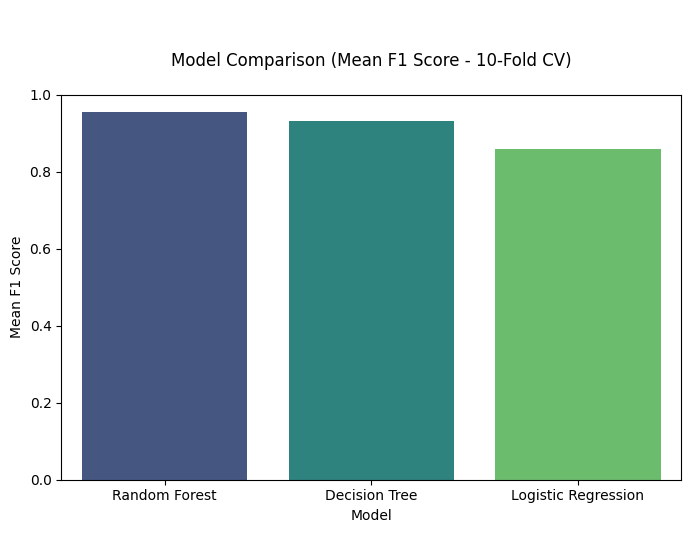

In [8]:
# ============================================
# 8. Model Comparison with Cross-Validation
# ============================================

# Define a dictionary of models to compare
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),  # Logistic Regression with increased max iterations
    'Decision Tree': DecisionTreeClassifier(),  # Basic Decision Tree classifier
    'Random Forest': RandomForestClassifier()  # Ensemble method using multiple decision trees
}

# Define evaluation metrics to use during cross-validation
metrics = {
    'Accuracy': 'accuracy',  # Overall correctness
    'Precision': 'precision',  # True Positives / (True Positives + False Positives)
    'Recall': 'recall',  # True Positives / (True Positives + False Negatives)
    'F1 Score': 'f1'  # Harmonic mean of precision and recall
}

# Initialize an empty list to store results for each model
results = []

# Loop through each model and evaluate using 10-fold cross-validation
for name, model in models.items():
    model_result = {'Model': name}  # Store model name
    for metric_name, metric in metrics.items():
        # Perform 10-fold cross-validation using the specified metric
        scores = cross_val_score(model, X_res, y_res, cv=10, scoring=metric)
        # Store mean and standard deviation of the scores
        model_result[f'Mean {metric_name}'] = np.mean(scores)
        model_result[f'Std {metric_name}'] = np.std(scores)
    results.append(model_result)  # Append results for this model

# Convert results list to a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Sort models by highest mean F1 Score (most balanced metric)
results_df = results_df.sort_values(by='Mean F1 Score', ascending=False)

# Display cross-validation results
print("===== Cross-Validation Results =====\n")
print(results_df.round(4))

# Visualize F1 Score comparison across models using a bar plot
plt.figure(figsize=(8,5))
sns.barplot(data=results_df, x='Model', y='Mean F1 Score', palette='viridis')  # Create barplot
plt.title('\n\nModel Comparison (Mean F1 Score - 10-Fold CV)\n')
plt.ylabel('Mean F1 Score')
plt.ylim(0, 1)  # Set y-axis limits
plt.show()


Best Model: Random Forest

Test Set Evaluation:

[[923  49]
 [ 34 938]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       972
           1       0.95      0.97      0.96       972

    accuracy                           0.96      1944
   macro avg       0.96      0.96      0.96      1944
weighted avg       0.96      0.96      0.96      1944


Top Features with absolute proportions:

 age                            0.382581
avg_glucose_level              0.148519
bmi                            0.136895
work_type_Self-employed        0.065967
work_type_Private              0.059983
Residence_type_Urban           0.048445
gender_Male                    0.039202
smoking_status_never smoked    0.029076
smoking_status_smokes          0.027645
ever_married                   0.017781
dtype: float64


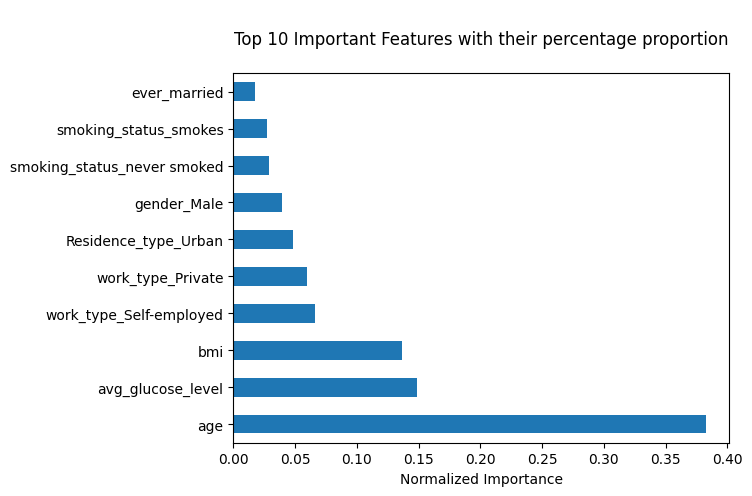

In [9]:
# =========================================
# 9. Train-Test Split & Best Model Training
# =========================================

# Split the balanced dataset into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res  # Stratify ensures class balance in both sets
)

# Identify the model with the highest mean F1 Score from cross-validation results
best_model_name = results_df.iloc[0]['Model']  # Select top-performing model
print(f"\nBest Model: {best_model_name}")  # Display chosen model

# Retrieve the best model from the models dictionary
best_model = models[best_model_name]  # Load model object

# Train the best model on the training data
best_model.fit(X_train, y_train)  # Fit model to training set

# Predict stroke outcomes on the test set
y_pred = best_model.predict(X_test)  # Generate predictions

# Evaluate model performance on the test set
print("\nTest Set Evaluation:\n")
print(confusion_matrix(y_test, y_pred))  # Show confusion matrix (TP, FP, FN, TN)
print(classification_report(y_test, y_pred))  # Show precision, recall, F1 score, and support

# Display feature importance if the model supports it (e.g., tree-based models)
if hasattr(best_model, 'feature_importances_'):
    # Extract and sort feature importances
    feat_imp = pd.Series(best_model.feature_importances_, index=X_res.columns).sort_values(ascending=False)
    print("\nTop Features with absolute proportions:\n\n", feat_imp.head(10))  # Show top 10 raw importances

    # Normalize importances to show percentage contribution
    feat_imp = feat_imp / feat_imp.sum()

    # Plot top 10 features by normalized importance
    feat_imp.head(10).plot(kind='barh')  # Horizontal bar chart
    plt.xlabel("Normalized Importance")  # X-axis label
    plt.title("\nTop 10 Important Features with their percentage proportion\n")  # Chart title
    plt.show()

In [11]:
# =========================================
# 10. Interactive Stroke Prediction Tool
# =========================================

def predict_stroke_users_interactive(model, feature_info, training_columns):
    """
    Interactive Stroke Prediction Tool consistent with training preprocessing.

    Allows user to input feature values interactively and predicts stroke risk
    using the trained model.

    Parameters:
        model : trained sklearn model
        feature_info : dict of {feature_name: allowed_values or 'numeric'}
        training_columns : list of columns after one-hot encoding
    """

    # Welcome message and instructions
    print("=== Stroke Prediction Tool (One-Hot Encoded) ===")
    print("\nType 'stop' at any time to exit.\n")
    print("Enter your data in the provided box \n")

    while True:
        user_data = {}  # Dictionary to store user inputs

        # Collect user inputs for each feature
        for feature, allowed in feature_info.items():
            while True:
                value = input(f"{feature}: ")  # Prompt user for input
                if value.lower() == 'stop':
                    print("\nExiting prediction tool.")
                    return  # Exit loop and function

                # Handle numeric input
                if allowed == 'numeric':
                    try:
                        user_data[feature] = float(value)  # Convert to float
                        break
                    except ValueError:
                        print("Invalid input. Enter a numeric value.")

                # Handle binary yes/no input
                elif allowed == ['yes', 'no']:
                    if value.lower() in ['yes', 'no']:
                        user_data[feature] = 1 if value.lower() == 'yes' else 0  # Encode as 1/0
                        break
                    else:
                        print("Enter yes or no.")

                # Handle multi-category input
                else:
                    allowed_lower = [v.lower() for v in allowed]  # Normalize allowed values
                    if value.lower() in allowed_lower:
                        idx = allowed_lower.index(value.lower())
                        user_data[feature] = allowed[idx]  # Store original case value
                        break
                    else:
                        print(f"Invalid input. Allowed: {allowed}")

        # Convert user input dictionary to DataFrame
        new_data = pd.DataFrame([user_data])

        # Identify multi-category features for one-hot encoding
        categorical_features = [
            f for f, allowed in feature_info.items()
            if allowed != 'numeric' and allowed != ['yes', 'no']
        ]

        # Apply one-hot encoding to multi-category features
        if categorical_features:
            new_data_encoded = pd.get_dummies(new_data, columns=categorical_features, drop_first=True)
        else:
            new_data_encoded = new_data.copy()

        # Align encoded input with training columns (fill missing with 0)
        new_data_encoded = new_data_encoded.reindex(columns=training_columns, fill_value=0)

        # Predict stroke class and probability
        pred_class = model.predict(new_data_encoded)[0]  # Predicted label
        pred_proba = model.predict_proba(new_data_encoded)[0]  # Probability scores

        # Display prediction results
        print("\n\n===== Prediction Result =====")
        print(f"\nPredicted Class: {pred_class}")  # 0 = No Stroke, 1 = Stroke
        print(f"\nProbability [Class 0, Class 1]: {pred_proba}\n")  # Confidence scores
        print("-" * 50 + "\n")


# Define feature types and allowed values for user input
feature_info = {
    'gender': ['Male', 'Female'],
    'age': 'numeric',
    'hypertension': ['yes', 'no'],
    'heart_disease': ['yes', 'no'],
    'ever_married': ['yes', 'no'],
    'work_type': ['Private', 'Self-employed', 'Govt_job', 'Children', 'Never_worked'],
    'Residence_type': ['Urban', 'Rural'],
    'avg_glucose_level': 'numeric',
    'bmi': 'numeric',
    'smoking_status': ['formerly smoked', 'never smoked', 'smokes']
}

# Launch the interactive prediction tool
predict_stroke_users_interactive(best_model, feature_info, X_res.columns)

=== Stroke Prediction Tool (One-Hot Encoded) ===

Type 'stop' at any time to exit.

Enter your data in the provided box 

gender: other
Invalid input. Allowed: ['Male', 'Female']
gender: female
age: 67
hypertension: yes
heart_disease: no
ever_married: married
Enter yes or no.
ever_married: yes
work_type: private
Residence_type: rural
avg_glucose_level: 150
bmi: 40
smoking_status: formerly smoked


===== Prediction Result =====

Predicted Class: 0

Probability [Class 0, Class 1]: [0.61 0.39]

--------------------------------------------------

gender: stop

Exiting prediction tool.
